In [ ]:
# Temel Bileşen Analizi (Principal Component Analysis)

# Temel fikri, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir.
# Küçük miktarda bir veri kaybını göze alıp değişken boyutunu azaltmaktır.
# Boyut İndirgeme Yaklaşımı

In [27]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
warnings.simplefilter(action="ignore", category=Warning)

df = pd.read_csv("Hitters.csv")
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
df = df[num_cols] 
# Kategorik ve Maaş Değişkenlerini çıkardık.
df.dropna(inplace=True) 
# Eskiklik olanları da çıkardık

In [ ]:
df = StandardScaler().fit_transform(df)

pca = PCA() # Bir PCA nesnesi oluştur.
pca_fit = pca.fit_transform(df) # PCA modeli, df veri kümesine uygulanır.

pca.explained_variance_ratio_ # Varyans Oranları -> 16 değişkenin değerlerlerini görüyoruz.
# PCA modelinin her bir bileşenin açıkladığı varyans oranlarını

np.cumsum(pca.explained_variance_ratio_) # Kümülatif toplam -> Toplam ne kadar bilgi açıklıyor.
# Her bir bileşenin eklenmesiyle açıklanan toplam varyansın nasıl arttığını görebiliriz.

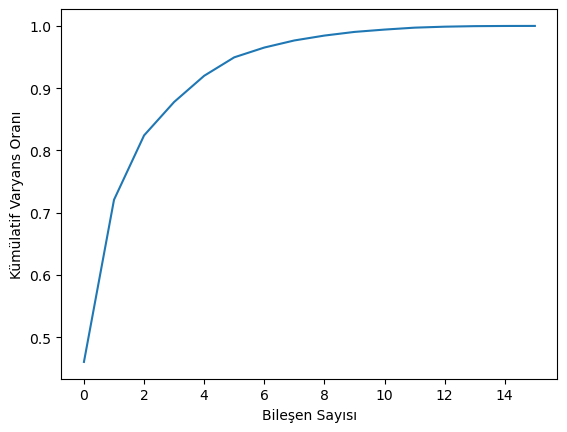

In [14]:
#########################
# Optimum Bileşen Analizi
#########################

# En keskin, en belirgin geçiş kısmına göre seçeceğiz.
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [18]:
############################
# Final PCA'in Oluşturulması
############################

pca = PCA(n_components=3) # 3 değişken en mantıklısı olur diye gözlemledik.
pca_fit = pca.fit_transform(df) # Df bu üç temel bileşenlerden oluşan yeni bir veri kümesine dönüştürür

pca.explained_variance_ratio_ # Varyans Oranları -> 3 değişkenin değerlerlerini görüyoruz.
np.cumsum(pca.explained_variance_ratio_) # Kümülatif toplam -> Toplam ne kadar bilgi açıklıyor.

array([0.46037855, 0.72077704, 0.82416565])

In [22]:
#########################################################################
# Temel Bileşen Regresyon Modeli (Principal Component Regression) # BONUS

# Bir regresyon tekniği olan ve temel bileşen analizi (PCA) ile regresyonun birleştirilmesinden oluşan bir yöntemdir.
# PCR, çoklu doğrusal regresyon problemlerinde kullanılan bir tekniktir ve özellikle çoklu kolineariteye sahip 
# veri setlerinde etkili olabilir.
#########################################################################

df = pd.read_csv("Hitters.csv")
df.shape # 322 gözlem
len(pca_fit) # 322 gözlem

num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols) # 16 değişken

others = [col for col in df.columns if col not in num_cols]
len(others) # 4 değişken

In [24]:
pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head() # Df haline getirdik.

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [25]:
# Birleştirme İşlemi Gerçekleştirdik.
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]), df[others]], axis=1)
final_df

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N
...,...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,N,E,700.0,N
318,3.339811,-0.732713,3.114194,A,E,875.0,A
319,-0.951442,-0.910086,0.286517,A,W,385.0,A
320,2.091473,-2.265826,-0.192745,A,E,960.0,A


In [31]:
# Regresyon Modeli Kuracağız
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Kategorik sütunları sayısal değerlere dönüştürmek
def label_encoder(df, binary_col):
    labelencoder = LabelEncoder()
    df[binary_col] = labelencoder.fit_transform(df[binary_col])
    return df

for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df,col)

final_df.dropna(inplace=True)
final_df

,PC1,PC2,PC3,League,Division,Salary,NewLeague
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1
5,1.229535,-1.825093,3.659220,0,1,750.0,0
...,...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,1,0,700.0,1
318,3.339811,-0.732713,3.114194,0,0,875.0,0
319,-0.951442,-0.910086,0.286517,0,1,385.0,0
320,2.091473,-2.265826,-0.192745,0,0,960.0,0


In [32]:
y = final_df["Salary"] # Bağımlı Değişken
X = final_df.drop(["Salary"], axis=1) # Bağımsız Değişken

# Doğrusal regresyon modeli kullanarak 5-kat çapraz doğrulama yaparak kök ortalama karesel hata (RMSE) değerini hesaplar.

# Doğrusal regresyon, bir bağımlı değişkenin bir veya daha fazla bağımsız değişken tarafından
# açıklanmaya çalışıldığı istatistiksel bir modelleme tekniğidir.

lm = LinearRegression()
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))
rmse # 345.60211063519677

# Daha düşük RMSE değerleri, daha iyi tahmin performansını gösterir.

345.60211063519677

In [33]:
# Karar ağacı regresyon modeli kullanarak 5-kat çapraz doğrulama yaparak kök ortalama karesel hata (RMSE) değerini hesaplar.
# Karar ağacı regresyon modeli, bir bağımlı değişkenin değerini tahmin etmek için kullanılan bir makine öğrenimi modelidir.

cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart,X,y,cv=5,scoring="neg_mean_squared_error"))) # Hata ortalaması
rmse # 389.47505982846525

389.47505982846525

In [39]:
# Hiperparametre Optimizasyonu
from sklearn.model_selection import GridSearchCV

# karar ağacı regresyon modelinin max_depth ve min_samples_split gibi hiperparametrelerinin
# farklı değerlerini denemek için kullanılır
cart_params = {"max_depth": range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV, hiperparametre optimizasyonu için kullanılan bir çapraz doğrulama aracıdır. 
cart_best_grid = GridSearchCV(cart, cart_params, cv=5, n_jobs=1, verbose=1).fit(X,y)

# En iyi hiperparametrelerle yeni bir karar ağacı regresyon modeli oluşturur. 
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X,y)

rmse = np.mean(np.sqrt(-cross_val_score(cart_final,X,y,cv=5,scoring="neg_mean_squared_error"))) # Hata ortalaması
rmse # 330.1964109339104

Fitting 5 folds for each of 180 candidates, totalling 900 fits


330.1964109339104

In [ ]:
# Mülakat Sorusu
# Elimde bir veri seti var label'im yok ama sınıflandırma problemi çözmek istiyorum, sınıflandırma modeli kurmak istiyorum?

# Cevabı
# Önce unsupervised bir şekilde çeşitli cluster'lar çıkarırım.
# Bu çıkardığım cluster'lara label muamelesi yaparım.
# Daha sonra bu çıkardığım cluster'Lar = sınıflar
# Sınıflandırıcıya sokarım.